In [4]:
%%capture
%run predict.ipynb
import time as tm
import numpy as np
import os

# Perform longest common subsequence search on the (truncated) code and gold code
def lcs( str1, str2, p, q ):
    if p == 0 or q == 0:
        return 0
    elif str1[p-1] == str2[q-1]:
        return 1 + lcs( str1, str2, p - 1, q - 1 )
    else:
        return max( lcs( str1, str2, p - 1, q ), lcs( str1, str2, p, q - 1 ) )

def getLCS( code, goldCode ):
    return lcs( code, goldCode, min( len( code ), 4 ), len( goldCode ) )

# If there are 100 test points and the prediction code returns 110 predictions
# then we only consider the first 100 and discard the last 10 predictions. On
# the other hand, if the code returns only 90 predictions, then we assume that
# these were predictions on the first 90 test points and evaluate accordingly

def getCodeLengthMatch( numChars, goldNumChars ):
    minLen = min( len( numChars ), len( goldNumChars ) )
    return np.count_nonzero( numChars[0:minLen] == goldNumChars[0:minLen] )

def getCodeMatchScore( codes, goldCodes ):
    totScore = 0
    for i in range( min( len( codes ), len( goldCodes ) ) ):
        totScore += getLCS( codes[i], goldCodes[i] ) / len( goldCodes[i] )
    return totScore

numTest = 0
filepaths = []
goldCodes = []
# file = open( "test/code.txt", "w" )
for filepath in os.listdir("../train"):
    numTest += 1
    filepaths.append("../train/"+filepath)
    goldCodes.append(filepath.split(".")[0])


# filepaths = [ "../test/image%d.png" % (i+1) for i in range( numTest ) ]
# goldCodes = file.read().splitlines()
# file.close()
goldNumChars = np.array( [ len( goldCodes[i] ) for i in range( len( goldCodes ) ) ] )

# Get recommendations from predict.py and time the thing
tic = tm.perf_counter()
(numChars, codes) = decaptcha( filepaths )
toc = tm.perf_counter()



In [12]:
print( "Total time taken is %.6f seconds " % (toc - tic) )
print( "Fraction of code lengths that match is %.6f" % (getCodeLengthMatch( numChars, goldNumChars ) / numTest)  )
print( "Code match score is %.6f" % (getCodeMatchScore( codes, goldCodes ) / numTest) )

Total time taken is 52.704044 seconds 
Fraction of code lengths that match is 1.000000
Code match score is 1.000000


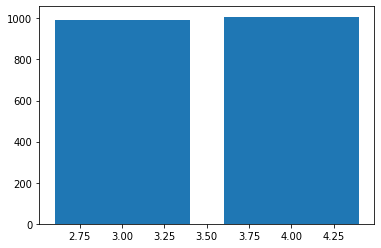

In [11]:
import matplotlib.pyplot as plt
x,y = np.unique(numChars, return_counts=True)
plt.bar(x,y)
plt.show()
